# MSTICPy - Intermediate/Advance Use
## Notebooks and Microsoft Sentinel Training #3

msticpy is a library for InfoSec investigation and hunting in Jupyter Notebooks. It includes functionality to:
- query log data from multiple sources
- enrich the data with Threat Intelligence, geolocations and Azure resource data
- extract Indicators of Activity (IoA) from logs and unpack encoded data
- perform sophisticated analysis such as anomalous session detection and time series decomposition
- visualize data using interactive timelines, process trees and multi-dimensional Morph Charts

It also includes some time-saving notebook tools such as widgets to set query time boundaries, select and display items from lists, and configure the notebook environment.

- Source Code: https://github.com/microsoft/msticpy
- Python Package: https://pypi.org/project/msticpy/
- Docs: https://msticpy.readthedocs.io/en/latest/

---

# Contents

#### [1. Introduction](#introduction)
- 1.1 What's New
- 1.2 Optional components/dependencies

#### [2. Data Queries](#dataqueries)
- 2.1 Recap
- 2.2 Parameters
- 2.3 Query time ranges
- 2.4 Querying other data sources - Microsoft Defender 365
- 2.5 Creating/saving your own queries

#### [3. Incident Triage](#incident)

#### [4. Enriching data with Threat Intelligence (and others)](#pivots)
- 4.1 Introduction to Pivot functions
- 4.2 Pivot on individual values
- 4.3 Pivot from DataFrames
- 4.4 Joining input to your output
- 4.5 Pivoting with RiskIQ

#### [5. Visualization](#visualization)
- 5.1 Timelines and timeline values
- 5.2 Matrix plots for large data sets
- 5.3 Process Trees
- 5.4 Time series for temporal pattern anomalies

#### [6. Extras](#extras)
- 6.1 Open Threat Research Security Data sets

### [7. Conclusion and Resources](#resources)


---
# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="introduction">1. Introduction</p>

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">1.1 Background</p>
- Watch the first two parts of this series
  - [Getting started with Microsoft Sentinel Notebooks](https://microsofteur.sharepoint.com/:v:/t/AzureSentinelEngineering/EYxxSQidW_BMvLA7ZjC3zsUBnT7weS2V_c8CUu4mg9ALnA?e=uVTCGS)
  - [MSTICPy Fundamentals to create your own notebooks](https://microsofteur.sharepoint.com/teams/AzureSentinelEngineering/Shared%20Documents/Forms/AllItems.aspx?xsdata=MDN8MDF8fDcyMGIwNjc1NzhiYTQzZjdiM2IxYmNiODg0NzQ1ZTgxfDcyZjk4OGJmODZmMTQxYWY5MWFiMmQ3Y2QwMTFkYjQ3fDF8MHw2Mzc2NDE2MDU2NDQ5NTEzOTR8R29vZHxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaUlpd2lRVTRpT2lJaUxDSlhWQ0k2TVRKOQ%3D%3D&sdata=RStPaXZ4OHZueTdWTC9nNVlhN0xmTllHWFVOQzRTcC8vbTZCcUJEaUUwMD0%3D&ovuser=72f988bf-86f1-41af-91ab-2d7cd011db47%2csayoung%40microsoft.com&OR=Teams-HL&CT=1634845771347&id=/teams/AzureSentinelEngineering/Shared%20Documents/Azure%20Sentinel%20training%20decks/Azure%20Notebooks%20Training/Azure%20Sentinel%20Notebooks%20training%20_2%20-%20MSTICPY%20Fundamentals%20to%20create%20your%20own%20notebooks-20211021_080433-Meeting%20Recording.mp4&parent=/teams/AzureSentinelEngineering/Shared%20Documents/Azure%20Sentinel%20training%20decks/Azure%20Notebooks%20Training)


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">1.2 What's new</p>

### Single sign-on with Managed Identities

- Your sign-in credentials from Azure Machine Learning are used automatically for MS Sentinel
- You can override this (in the query provider) with `mp_az_auth=False` (see later)

### The MSTICPy Configuration tool now works in non-geological timescales in Azure Machine Learning!

In [1]:
import msticpy
msticpy.init_notebook(globals())
msticpy.MpConfigEdit()

Label(value='Loading. Please wait.')

---
## <p style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="extras">1.3 Extras - installing optional dependencies</p>

<p style="border: solid; padding:5pt;"><b>Notes: </b><br>
1. This doesn't affect the MSTICPy code that's installed - only the dependencies<br>
2. Often, you won't need this unless you want the specific *extra* functionality<br>
3. Use %pip within the notebook, not !pip.
</p>

MSTICPy is a library with a broad range of functionality and a **lot** of dependencies. As such, installing all of the dependencies can take a lot of time.

MSTICPy has implemented a series of  Extras that allow for subsets of these dependencies. These Extras are grouped around core technologies that you might want to use with MSTICPy.

| Extra      | Functionality 
|------------|-------------------------------------------------------------|
| --none--   | Most functionality (approx 75%) Kqlmagic Jupyter basic
| keyvault   | Key Vault and keyring storage of settings secrets
| azure      | Azure API data retrieval, Azure storage APIs, Sentinel APIs 
| kql        | Kqlmagic Jupyter extended functionality
| azsentinel | Combination of core install + "azure", "keyvault", "kql"
| ml         | Timeseries analysis, Event clustering, Outlier analysis
| splunk     | Splunk data queries
| vt3        | VirusTotal V3 graph API
| riskiq     | RiskIQ Illuminate threat intel provider & pivot functions
| all        | Includes all of above packages
| dev        | Development tools plus "base"
| test       | "dev" plus "all"

To install a specific Extra, use the following syntax:
`%pip install msticpy[extra]`

You can also install multiple extras at once:
`%pip install msticpy[extra1,extra2,...]`

### If you see this kind of exception - install the extra mentioned

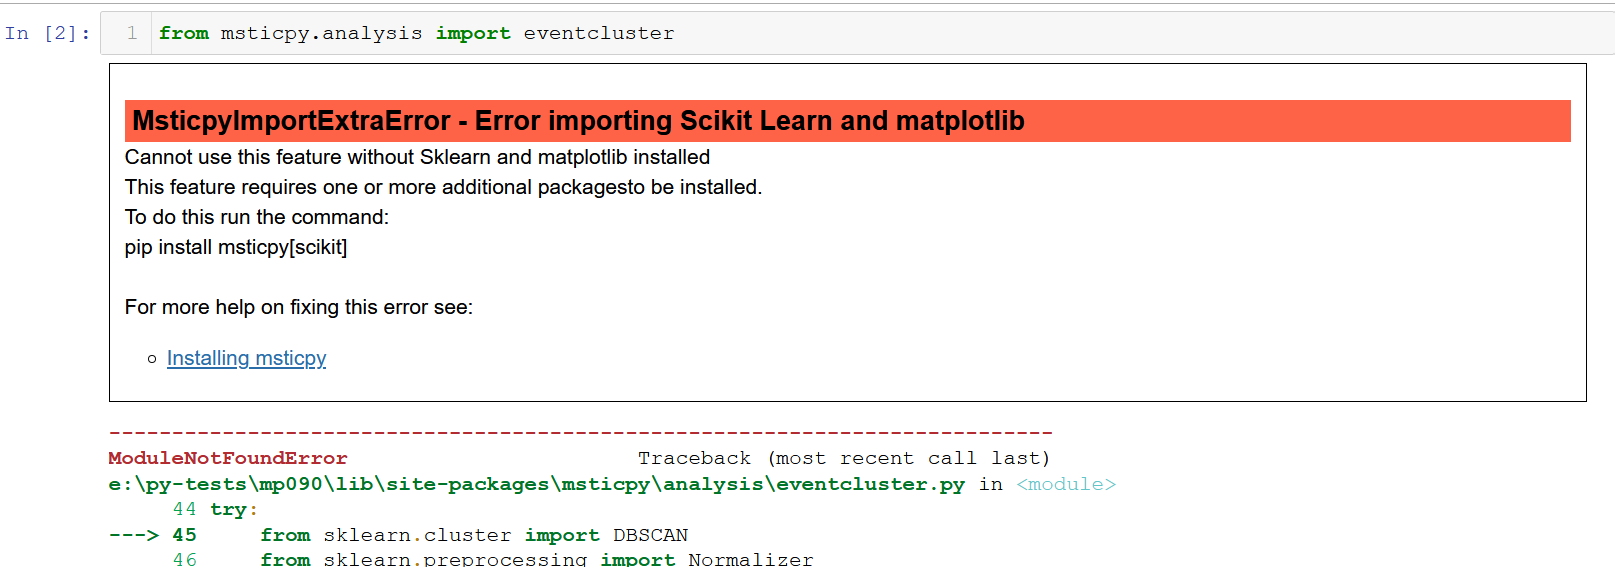

In [132]:
from IPython.display import Image
fname = "/images/extra_exception.png"
gh_path = "https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master"
img_path = f"..{fname}" if Path(f"..{fname}").is_file() else f"{gh_path}{fname}"
Image("../images/extra_exception.png", width=1000)

---
# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="dataqueries">2. Data Queries</p>

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">2.1. Recap</p>

In the last training session we covered:
- Authenticating to Microsoft Sentinel
- Browsing and listing queries
- Running queries

In [2]:
qry_prov=QueryProvider("AzureSentinel")
ws_config = WorkspaceConfig(workspace="CyberSecuritySOC")

Please wait. Loading Kqlmagic extension...done


### New and Improved!

Once set up we can tell the `QueryProvider` to `connect` which will kick off the authentication process.

#### Old way
```python
!az connect
qry_prov.connect(ws_config, mp_az_auth="cli")
```

#### Integrated auth with MSI

In [3]:
qry_prov.connect(ws_config)

Connecting... 

connected


In [4]:
qry_prov.browse()

In [7]:
qry_prov.WindowsSecurity.list_host_logons?

Signature:       qry_prov.WindowsSecurity.list_host_logons(*args, **kwargs) -> Union[pandas.core.frame.DataFrame, Any]
Call signature:  qry_prov.WindowsSecurity.list_host_logons(*args, **kwargs)
Type:            partial
String form:     functools.partial(<bound method QueryProvider._execute_query of <msticpy.data.data_providers.QueryProvider object at 0x000001421B93F100>>, query_path='WindowsSecurity', query_name='list_host_logons')
File:            f:\anaconda\envs\msticpy\lib\functools.py
Docstring:      
Retrieves the logon events on the host

Parameters
----------
add_query_items: str (optional)
    Additional query clauses
end: datetime
    Query end time
event_filter: str (optional)
    Event subset
    (default value is: | where EventID == 4624)
host_name: str
    Name of host
query_project: str (optional)
    Column project statement
    (default value is:  | project TenantId, Account, EventID, TimeGenerat...)
start: datetime
    Query start time
subscription_filter: str (optio

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">2.3 Query parameters</p>

In [8]:
logons_df = qry_prov.WindowsSecurity.list_host_logons(host_name="WORKSTATION6")
print(f"Total records: {len(logons_df)} - First record {logons_df.TimeGenerated.min()}, Last record {logons_df.TimeGenerated.max()}")
logons_df.head(5)

Total records: 1716 - First record 2022-01-11 00:54:05.133000+00:00, Last record 2022-01-12 00:52:08.283000+00:00


,TenantId,Account,EventID,TimeGenerated,SourceComputerId,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonProcessName,LogonType,LogonTypeName,AuthenticationPackageName,Status,IpAddress,WorkstationName,TimeCreatedUtc
0,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:03.030000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:03.030000+00:00
1,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:07.890000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:07.890000+00:00
2,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:03.030000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:03.030000+00:00
3,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:07.890000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:07.890000+00:00
4,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:52:07.927000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:52:07.927000+00:00


#### Where did `start` and `end` parameters come from?

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">2.3 Query Times</p>

In [9]:
qry_prov.query_time

In [10]:
logons_df = qry_prov.WindowsSecurity.list_host_logons(host_name="WORKSTATION6")
print(f"Total records: {len(logons_df)} - First record {logons_df.TimeGenerated.min()}, Last record {logons_df.TimeGenerated.max()}")
logons_df.head(5)

Total records: 1716 - First record 2022-01-11 00:54:05.133000+00:00, Last record 2022-01-12 00:52:08.283000+00:00


,TenantId,Account,EventID,TimeGenerated,SourceComputerId,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonProcessName,LogonType,LogonTypeName,AuthenticationPackageName,Status,IpAddress,WorkstationName,TimeCreatedUtc
0,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:03.030000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:03.030000+00:00
1,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:07.890000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:07.890000+00:00
2,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:03.030000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:03.030000+00:00
3,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:47:07.890000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:47:07.890000+00:00
4,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 23:52:07.927000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 23:52:07.927000+00:00


### Can set `start` and `end` parameters manually
- Python datetimes
- datetime strings
- integers/floats (days, relative to now)

In [11]:
logons_df = qry_prov.WindowsSecurity.list_host_logons(host_name="WORKSTATION6", start=-0.35, end=-0.25)
print(f"Total records: {len(logons_df)} - First record {logons_df.TimeGenerated.min()}, Last record {logons_df.TimeGenerated.max()}")
logons_df.head(5)

Total records: 165 - First record 2022-01-11 16:32:05.323000+00:00, Last record 2022-01-11 18:52:06.153000+00:00


,TenantId,Account,EventID,TimeGenerated,SourceComputerId,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonProcessName,LogonType,LogonTypeName,AuthenticationPackageName,Status,IpAddress,WorkstationName,TimeCreatedUtc
0,8ecf8077-cf51-4820-aadd-14040956f35d,SECCXP.NINJA\WORKSTATION6$,4624,2022-01-11 18:48:01.807000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,-,-,S-1-0-0,WORKSTATION6$,SECCXP.NINJA,S-1-5-18,0x8e753f7,Kerberos,3,3 - Network,Kerberos,,::1,-,2022-01-11 18:48:01.807000+00:00
1,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 18:48:38.360000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 18:48:38.360000+00:00
2,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 18:47:06.130000+00:00,8d523f9f-e3b9-4c11-9537-d0d018eb621c,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 18:47:06.130000+00:00
3,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 18:47:00.557000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 18:47:00.557000+00:00
4,8ecf8077-cf51-4820-aadd-14040956f35d,NT AUTHORITY\SYSTEM,4624,2022-01-11 18:47:06.130000+00:00,87f0e74f-2ce2-42d3-a374-b00eee39b253,WORKSTATION6.seccxp.ninja,WORKSTATION6$,SECCXP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,Advapi,5,5 - Service,Negotiate,,-,-,2022-01-11 18:47:06.130000+00:00


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">2.4 Querying other data sources - Microsoft Defender 365</p>


In [12]:
qry_m365 = QueryProvider("MDE")  # Use M365D for MS Defender APIs
qry_m365.connect()

Connected.


In [13]:
list(filter(
    lambda x: "host" in x.lower(),
    qry_m365.list_queries())
)

['MDATP.host_alerts', 'MDATP.host_connections', 'MDATP.list_host_processes']

In [14]:
qry_m365.MDATP.host_connections("?")

Query:  host_connections
Data source:  MDE
Lists alerts by for a specified hostname

Parameters
----------
add_query_items: str (optional)
    Additional query clauses
end: datetime
    Query end time
host_name: str
    Name of host
    Aliases: 'hostname'
start: datetime
    Query start time
table: str (optional)
    Table name
    (default value is: DeviceNetworkEvents)
Query:
 {table} | where Timestamp >= datetime({start}) | where Timestamp <= datetime({end}) | where DeviceName has "{host_name}" {add_query_items}


In [15]:
qry_m365.exec_query(
    "DeviceProcessEvents | where Timestamp > ago(1d) | summarize count() by DeviceName | limit 5"
)

,DeviceName,count_
0,atevet06sql001.defenderatevet06.onmicrosoft.com,654
1,atevet06cl003.defenderatevet06.onmicrosoft.com,435
2,atevet06cl002.defenderatevet06.onmicrosoft.com,469
3,atevet06ex002.defenderatevet06.onmicrosoft.com,846
4,atevet06cl001.defenderatevet06.onmicrosoft.com,512


In [16]:
qry_m365.MDATP.list_host_processes(
    host_name="atevet06cl003.defenderatevet06.onmicrosoft.com",
    start=-0.1,
    end=0
).head(5)

,Timestamp,DeviceId,DeviceName,ActionType,FileName,FolderPath,SHA1,SHA256,MD5,FileSize,ProcessVersionInfoCompanyName,ProcessVersionInfoProductName,ProcessVersionInfoProductVersion,ProcessVersionInfoInternalFileName,ProcessVersionInfoOriginalFileName,ProcessVersionInfoFileDescription,ProcessId,ProcessCommandLine,ProcessIntegrityLevel,ProcessTokenElevation,ProcessCreationTime,AccountDomain,AccountName,AccountSid,AccountUpn,...,InitiatingProcessIntegrityLevel,InitiatingProcessTokenElevation,InitiatingProcessSHA1,InitiatingProcessSHA256,InitiatingProcessMD5,InitiatingProcessFileName,InitiatingProcessFileSize,InitiatingProcessVersionInfoCompanyName,InitiatingProcessVersionInfoProductName,InitiatingProcessVersionInfoProductVersion,InitiatingProcessVersionInfoInternalFileName,InitiatingProcessVersionInfoOriginalFileName,InitiatingProcessVersionInfoFileDescription,InitiatingProcessId,InitiatingProcessCommandLine,InitiatingProcessCreationTime,InitiatingProcessFolderPath,InitiatingProcessParentId,InitiatingProcessParentFileName,InitiatingProcessParentCreationTime,InitiatingProcessSignerType,InitiatingProcessSignatureStatus,ReportId,AppGuardContainerId,AdditionalFields
0,2022-01-12 00:18:05.026493800+00:00,624af2e5b912699b82f744daaa9385f74c1c2283,atevet06cl003.defenderatevet06.onmicrosoft.com,ProcessCreated,FindVolume.exe,C:\WindowsAzure\GuestAgent_2.7.41491.1024_2021-09-16_033117\GuestAgent\FindVolume\FindVolume.exe,014d3bada3647d5deecadf1b040a116dc013ccda,7f5401aab56a3b3e46b1a9f02151aa9c1e4b0e1741811d4ef2a17e3cf58e938f,5e519c91d3adf273c4b7de25b98ca818,176496.0,Microsoft Corporation,MicrosoftÂ® CoReXT,1.0.9.89,FindVolume,FindVolume.exe,Compute-IaaS-ProvisioningAgent master (749ec75) Microsoft AzureÃ‚Â®,8400,"""FindVolume.exe"" /label ""Temporary Storage""",System,TokenElevationTypeDefault,2022-01-12 00:18:04.649361700+00:00,nt authority,system,S-1-5-18,,...,System,TokenElevationTypeDefault,21118724e4099d5e38d23cf34106d336e531dbd0,24fca39581a6de7ae7d6eb1cd157435698797fd91a31c83a78fe73623d29b1dd,79cb7beb3e13847339dbf67a0f99f364,WaAppAgent.exe,88776,Microsoft Corporation,MicrosoftÂ® CoReXT,2.7.41491.1024,WaAppAgent,WaAppAgent.exe,Microsoft AzureÃ‚Â®,3200,WaAppAgent.exe,2021-12-16 03:28:11.296286600+00:00,c:\windowsazure\guestagent_2.7.41491.1024_2021-09-16_033117\waappagent.exe,816,services.exe,2021-12-16 03:28:07.042663300+00:00,OsVendor,Valid,244951,,
1,2022-01-12 00:18:05.027034700+00:00,624af2e5b912699b82f744daaa9385f74c1c2283,atevet06cl003.defenderatevet06.onmicrosoft.com,ProcessCreated,conhost.exe,C:\Windows\System32\conhost.exe,ba93b6f897778b91db9d179e14c352af82210061,22117361c2c34cb18beee2ca9770b3aa6c8d032a0941991454dd222bec6d9295,d837fa4dee7d84c19ff6f71fc48a6625,889344.0,Microsoft Corporation,MicrosoftÂ® WindowsÂ® Operating System,10.0.19041.1320,ConHost,CONHOST.EXE,Console Window Host,5280,conhost.exe 0xffffffff -ForceV1,System,TokenElevationTypeDefault,2022-01-12 00:18:04.664430200+00:00,nt authority,system,S-1-5-18,,...,System,TokenElevationTypeDefault,014d3bada3647d5deecadf1b040a116dc013ccda,7f5401aab56a3b3e46b1a9f02151aa9c1e4b0e1741811d4ef2a17e3cf58e938f,5e519c91d3adf273c4b7de25b98ca818,FindVolume.exe,176496,Microsoft Corporation,MicrosoftÂ® CoReXT,1.0.9.89,FindVolume,FindVolume.exe,Compute-IaaS-ProvisioningAgent master (749ec75) Microsoft AzureÃ‚Â®,8400,"""FindVolume.exe"" /label ""Temporary Storage""",2022-01-12 00:18:04.649361700+00:00,c:\windowsazure\guestagent_2.7.41491.1024_2021-09-16_033117\guestagent\findvolume\findvolume.exe,3200,WaAppAgent.exe,2021-12-16 03:28:11.296286600+00:00,OsVendor,Valid,244952,,
2,2022-01-12 00:18:05.921960600+00:00,624af2e5b912699b82f744daaa9385f74c1c2283,atevet06cl003.defenderatevet06.onmicrosoft.com,ProcessCreated,CollectGuestLogs.exe,C:\WindowsAzure\GuestAgent_2.7.41491.1024_2021-09-16_033117\CollectGuestLogs.exe,ef4471d5b11b630505bffd5b277935afb714b690,b6690a1932f658157d2b7cf8c6fba379a185d93bb550977edc614d4562185184,0e623ff270d726dc80fdef8186f59eb2,94848.0,azgaext,CollectGuestLogs,3.0.01


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">2.5 Creating/saving your own queries</p>

A template query looks like this

```yaml
sources:
  ...
  list_ip_connections:
    description: Lists alerts associated with a specified remote IP
    metadata:
    args:
      query: '
        {table}
        | where Timestamp >= datetime({start})
        | where Timestamp <= datetime({end})
        | where RemoteIP has "{ip_address}" or where LocalIP has "{ip_address}"
        {add_query_items}'
    parameters:
      ip_address:
        description: Remote IP Address
        type: str
```

- It is query language-agnostic
- Parameters are substituted using Python format strings
  - you might need to quote the parameter
  - or invoke a conversion function in the target language


In [ ]:
query_yaml = """
metadata:
  version: 1
  description: MDATP Queries
  data_environments: [MDATP, MDE, M365D]
  data_families: [MDATP]
  tags: ["network"]
defaults:
  metadata:
    data_source: "network_events"
  parameters:
    table:
      description: Table name
      type: str
      default: "DeviceNetworkEvents"
    start:
      description: Query start time
      type: datetime
    end:
      description: Query end time
      type: datetime
    add_query_items:
      description: Additional query clauses
      type: str
      default: ""
sources:
  list_ip_connections:
    description: Lists alerts associated with a specified remote IP
    metadata:
    args:
      query: '
        {table}
        | where Timestamp >= datetime({start})
        | where Timestamp <= datetime({end})
        | where RemoteIP has "{ip_address}" or where LocalIP has "{ip_address}"
        {add_query_items}'
    parameters:
      ip_address:
        description: Remote IP Address
        type: str
"""

#### Steps

1. Create your query file(s)
2. Save them to a folder
3. Add this to your `msticpyconfig.yaml`
or specify at runtime as param to QueryProvider

#### Config
```yaml
QueryDefinitions:
    Custom:
        - C:\queries
        - /home/user/custom_queries
```

#### Runtime parameter
```python
qry_prov = QueryProvider("M365", query_paths=["/home/user/custom_queries"])
```

<br>

See [Creating Custom Queries](https://msticpy.readthedocs.io/en/latest/data_acquisition/DataProviders.html#creating-new-queries)
for more details

---
# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="incident">3. Incident Explorer</p>

## See forthcoming *Guided Investigation - Incident Triage* notebook

In [18]:
from msticpy.data.azure_sentinel import AzureSentinel as Sentinel
# instantiate the Sentinel class and connect
sent_api = Sentinel()
sent_api.connect()
# Define our sentinel workspace
workspace_id = "/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/soc/providers/Microsoft.OperationalInsights/workspaces/cybersecuritysoc"

# set a timespan for incidents to display (last 24 hours)
start = pd.Timestamp.utcnow() - pd.Timedelta("1D")
end = pd.Timestamp.utcnow()

# Get current incidents
incidents = sent_api.get_incidents(workspace_id)

# Make sure that we have a timestamp of datetime type
# and filter incidents to our desired time range
incidents["timestamp"] = pd.to_datetime(incidents["properties.createdTimeUtc"], utc=True)
filtered_incidents = (
    incidents[incidents["timestamp"].between(start, end)] 
    if not incidents[incidents["timestamp"].between(start, end)].empty 
    else incidents
)

# plot a timeline of incidents
filtered_incidents.mp_plot.timeline(
    source_columns=["properties.title", "properties.status"],
    title="Incidents over time - grouped by severity",
    height=300,
    group_by="properties.severity",
    time_column="timestamp",
)

Loading BokehJS ...

Column(id='1105', ...)

In [21]:
# pick an incident ID and get full details
incident_uuid = "fac7e091-b7cb-4d27-88e6-61336ea63a36"
incident_id = f"{workspace_id}/providers/Microsoft.SecurityInsights/Incidents/{incident_uuid}"
incident_details = sent_api.get_incident(
    incident_id, entities=True, alerts=True
)
pd.DataFrame(incident_details.iloc[0])

,0
id,/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/soc/providers/Microsoft.Opera...
name,fac7e091-b7cb-4d27-88e6-61336ea63a36
etag,"""de022301-0000-0100-0000-61dde2210000"""
type,Microsoft.SecurityInsights/Incidents
properties.title,Detected obfuscated command line
properties.description,Azure Security Center has raised an alert of type Detected obfuscated command line
properties.severity,Low
properties.status,New
properties.owner.objectId,None
properties.owner.email,None


In [22]:
from msticpy.vis.entity_graph_tools import EntityGraph

# shortcut for time reasons - read saved incident details from file
incident_df = pd.read_pickle("../data/training_incident.pkl")

# Plot graph of incident
incident_graph = EntityGraph(incident_df.iloc[0])
incident_graph.plot()


Loading BokehJS ...

Loading BokehJS ...

Figure(id='1356', ...)

---

# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="pivots">4. Enriching data with Threat Intelligence (and others)</p>

- 4.1 Introduction to Pivot functions
- 4.2 Pivot on individual values
- 4.3 Pivot from DataFrames
- 4.4 Joining input to your output
- 4.5 Pivoting with RiskIQ

## Threat intelligence enrichment recap

In [23]:
# First we create our provider
ti_lookup = TILookup()
# Then we lookup results
ti_results = ti_lookup.lookup_ioc("91.211.89.33")
# Convert results to a DataFrame for ease of viewing
ti_results = ti_lookup.result_to_df(ti_results)
ti_results

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank


,Ioc,IocType,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
OTX,91.211.89.33,ipv4,None,OTX,True,high,"{'pulse_count': 3, 'names': ['Public report on attacks in Middle East we attribute to WIRTE APT'...","{'whois': 'http://whois.domaintools.com/91.211.89.33', 'reputation': 0, 'indicator': '91.211.89....",https://otx.alienvault.com/api/v1/indicators/IPv4/91.211.89.33/general,0
OPR,91.211.89.33,ipv4,None,OPR,False,information,IoC type ipv4 not supported.,None,None,1
RiskIQ,91.211.89.33,ipv4,None,RiskIQ,True,high,"{'summary': {'resolutions': 3, 'certificates': 11, 'malware_hashes': 0, 'projects': 0, 'articles...","{'summary': {'resolutions': 3, 'certificates': 11, 'malware_hashes': 0, 'projects': 0, 'articles...",https://community.riskiq.com,0
Tor,91.211.89.33,ipv4,None,Tor,True,information,Not found.,None,https://check.torproject.org/exit-addresses,0
VirusTotal,91.211.89.33,ipv4,None,VirusTotal,True,information,"{'verbose_msg': 'IP address in dataset', 'response_code': 1, 'positives': 0, 'detected_urls': []}","{'asn': 206638, 'undetected_urls': [['https://download-windowsupdate.net/', '5fa74fb873905b9e359...",https://www.virustotal.com/vtapi/v2/ip-address/report,0
XForce,91.211.89.33,ipv4,None,XForce,True,high,"{'score': 5.7, 'cats': {'Spam': 57}, 'categoryDescriptions': {'Spam': 'This category lists IP ad...","{'ip': '91.211.89.33', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional I...",https://api.xforce.ibmcloud.com/ipr/91.211.89.33,0


In [24]:
# We can also display them in a browser
TILookup.browse_results(ti_results)

### Azure Data Enrichment

MSTICPy also includes a number of Azure API integrations that can be used to enrich your data with additional data about Azure Resources. These are avaliable in two fromats, via the `AzureData` feature of MSTICPy and also via the new Azure Resource Graph data connector.

#### See [https://msticpy.readthedocs.io/data_acquisition/AzureData.html](https://msticpy.readthedocs.io/data_acquisition/AzureData.html)

In [25]:
from msticpy.data.azure_data import AzureData
# Create our Azure Data instance and connect
az_data = AzureData()
az_data.connect()

# get the host resource ID from Heartbeat table
host_res_id = qry_prov.Heartbeat.get_heartbeat_for_host(host_name="WORKSTATION12").iloc[0].ResourceId
host_res_id

'/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/SOC-AttackIQ/providers/Microsoft.Compute/virtualMachines/WORKSTATION12'

In [26]:
az_data.get_resource_details(sub_id="d1d8779d-38d7-4f06-91db-9cbc8de0176f", resource_id=host_res_id)

{'resource_id': '/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/SOC-AttackIQ/providers/Microsoft.Compute/virtualMachines/WORKSTATION12',
 'name': 'WORKSTATION12',
 'resource_type': 'Microsoft.Compute/virtualMachines',
 'location': 'eastus',
 'tags': None,
 'plan': None,
 'properties': {'vmId': '090cf642-37f3-4a51-bcfd-89f5f1c9bbb0',
  'hardwareProfile': {'vmSize': 'Standard_B2s'},
  'storageProfile': {'imageReference': {'publisher': 'microsoftwindowsdesktop',
    'offer': 'windows-11',
    'sku': 'win11-21h2-pro',
    'version': 'latest',
    'exactVersion': '22000.318.2111041236'},
   'osDisk': {'osType': 'Windows',
    'name': 'WORKSTATION12_OsDisk_1_c39845fdbadb4f0cbf86c9420803ae5a',
    'createOption': 'FromImage',
    'caching': 'ReadWrite',
    'managedDisk': {'storageAccountType': 'StandardSSD_LRS',
     'id': '/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/SOC-AttackIQ/providers/Microsoft.Compute/disks/WORKSTATION12_OsDisk_1_c39845fdbadb4

#### We can also use the `AzureSentinel` (soon to be renamed) class to get details about specific Microsoft Sentinel elements.

#### See [https://msticpy.readthedocs.io/data_acquisition/AzureSentinel.html](https://msticpy.readthedocs.io/data_acquisition/AzureSentinel.html)


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">4.1 Introduction to Pivot Functions</p>

Pivot functions are methods of **entities** that provide:
- data queries related to an entity
- enrichment functions relevant to that entity

Pivot functions are dynamically attached to entities. We created this
framework to make it easier to find which functions you can use for which entity type.

### Motivation
- We had built a lot of functionality in MSTICPy for querying and enrichment
- A lot of the functions had inconsistent type/parameter signatures
- There was no easy discovery mechanism for these functions - you had to know
- Using entities as pivot points is a "natural" investigation pattern

### Access functionality from entities


In [27]:
# Initialize Pivots (this will soon happen by default in init_notebook)
pivot = Pivot(namespace=globals())

In [28]:
pivot.browse()

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">4.2 Pivot on individual values</p>

In [30]:
from msticpy.datamodel.entities import IpAddress, Host, Account

display(IpAddress.whois("38.75.137.9"))
display(IpAddress.geoloc("38.75.137.9"))

,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,63023,38.75.136.0/23,US,1991-04-16,"AS-GLOBALTELEHOST, US",arin,"[{'cidr': '38.0.0.0/8', 'name': 'COGENT-A', 'handle': 'NET-38-0-0-0-1', 'range': '38.0.0.0 - 38....",None,38.75.137.9,None,None,None


,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,TimeGenerated,Type,AdditionalData,IpAddress
0,US,United States,California,Los Angeles,-118.2441,34.0544,None,None,geolocation,{},38.75.137.9


#### Queries are pivot functions too

In [40]:
Host.AzureSentinel.alerts(host_name="AdminHost", add_query_items="| limit 5")

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Techniques,Type,Computer,src_hostname,src_accountname,src_procname,host_match,acct_match,proc_match
0,8ecf8077-cf51-4820-aadd-14040956f35d,2022-01-11 12:01:37.133000+00:00,Detected obfuscated command line,Detected obfuscated command line,Low,Azure Security Center has raised an alert of type Detected obfuscated command line,Azure Security Center,Microsoft,3579f267ba652c1a9c778435af0193631e216cb27d259acae54c462eaf5682e4,b088f079-6e3e-ca02-f436-6c194b13bcc6,,,Detected obfuscated command line,,NaN,False,2022-01-11 11:00:49.702000+00:00,2022-01-11 11:58:00+00:00,2022-01-11 12:01:37.133000+00:00,,"{""IpAddress"":""225.44.141.232"",""FusionSyntheticAlert"":""true"",""TenantId"":""72f988bf-86f1-41af-91ab-...","[{""$id"":""3"",""AadTenantId"":""72f988bf-86f1-41af-91ab-2d7cd011db47"",""AadUserId"":""15a0568c-c056-db17...",Detection,,,,Azure Security Center,,,New,15a0568c-c056-db17-b7c2-60716161721d,Unknown,,SecurityAlert,AdminHost,AdminHost,,,True,False,False
1,8ecf8077-cf51-4820-aadd-14040956f35d,2022-01-11 04:01:50.536000+00:00,Network intrusion detection signature activation [seen multiple times],Network intrusion detection signature activation [seen multiple times],Low,Azure Security Center has raised an alert of type Network intrusion detection signature activati...,Azure Security Center,Microsoft,797c193f10fbd28c7fc4d7675b05f4d5ad95d323ed089985daa49214289caadb,b58a8af9-fa51-efd6-54f0-e03233e89ea2,,,Network intrusion detection signature activation [seen multiple times],,NaN,False,2022-01-11 02:58:35.412000+00:00,2022-01-11 03:58:00+00:00,2022-01-11 04:01:50.536000+00:00,,"{""IpAddress"":""170.19.125.242"",""FusionSyntheticAlert"":""true"",""TenantId"":""72f988bf-86f1-41af-91ab-...","[{""$id"":""3"",""AadTenantId"":""72f988bf-86f1-41af-91ab-2d7cd011db47"",""AadUserId"":""fa065872-c547-a2bb...",Detection,,,,Azure Security Center,,,New,fa065872-c547-a2bb-74f4-dad345a48d72,Unknown,,SecurityAlert,AdminHost,AdminHost,,,True,False,False
2,8ecf8077-cf51-4820-aadd-14040956f35d,2022-01-11 04:01:50.536000+00:00,Crypto-mining activity,Crypto-mining activity,Low,Azure Security Center has raised an alert of type Crypto-mining activity,Azure Security Center,Microsoft,98ee1484ab349368279e64bb98d8d393f76dbd9331b79286ad3facce99186907,41d87e0c-91bf-306b-5882-c6b5f6ad3553,,,Crypto-mining activity,,NaN,False,2022-01-11 03:08:20.867000+00:00,2022-01-11 03:58:00+00:00,2022-01-11 04:01:50.536000+00:00,,"{""IpAddress"":""170.19.125.242"",""FusionSyntheticAlert"":""true"",""TenantId"":""72f988bf-86f1-41af-91ab-...","[{""$id"":""3"",""AadTenantId"":""72f988bf-86f1-41af-91ab-2d7cd011db47"",""AadUserId"":""fa065872-c547-a2bb...",Detection,,,,Azure Security Center,,,New,fa065872-c547-a2bb-74f4-dad345a48d72,Unknown,,SecurityAlert,AdminHost,AdminHost,,,True,False,False
3,8ecf8077-cf51-4820-aadd-14040956f35d,2022-01-11 04:01:50.536000+00:00,IoT Devices - Suspicious compilation detected,IoT Devices - Suspicious compilation detected,Low,Azure Security Center has raised an alert of type IoT Devices - Suspicious compilation detected,Azure Security Center,Microsoft,8f0ee905251ca47b49902b5136eef530e9b9844111b7289bd8fce8dd46770465,f0edeaea-315f-1202-3f6d-e99ec4c237e1,,,IoT Devices - Suspicious compilation detected,,NaN,False,2022-01-11 03:15:09.403000+00:00,2022-01-11 03:58:00+00:00,2022-01-11 04:01:50.536000+00:00,,"{""IpAddress"":""170.19.125.242"",""FusionSyntheticAlert"":""true"",""TenantId"":""72f988bf-86f1-41af-91ab-...","[{""$id"":""3"",""AadTenantId"":""72f988bf-86f1-41af-91ab-2d7cd011db47"",""AadUserId"":""fa065872-c547-a2bb.

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">4.3 Pivot on DataFrames and Lists</p>

### *entity*.`pivot_func(list_or_iterable)`
### *entity*.`pivot_func(dataframe, column="col_name")`

In [41]:
%%ioc --out ip_list
	SourceIP	DestinationIP	TotalBytesSent	nir	asn_registry	asn	asn_cidr	asn_country_code	asn_date	asn_description	query	nets	raw	referral	raw_referral
0	10.0.3.5	40.124.45.19	621	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
1	10.16.12.1	40.124.45.19	1004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
2	10.4.5.12	13.71.172.130	247	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
3	10.4.5.12	40.77.232.95	189	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
4	10.4.5.16	13.71.172.130	46	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
5	10.4.5.16	65.55.44.109	120	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
6	10.90.78.142	104.43.212.12	12	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
7	10.90.78.71	104.43.212.12	4	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
8	20.185.182.48	38.75.137.9	8328	NaN	arin	8075

[('ipv4',
  ['10.4.5.12',
   '10.4.5.16',
   '38.75.137.9',
   '10.90.78.142',
   '40.124.45.19',
   '65.55.44.109',
   '10.0.3.5',
   '104.43.212.12',
   '13.71.172.130',
   '40.77.232.95',
   '10.90.78.71',
   '10.16.12.1',
   '20.185.182.48'])]

In [42]:
IpAddress.whois(ip_list["ipv4"])


,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,arin,63023,38.75.136.0/23,US,1991-04-16,"AS-GLOBALTELEHOST, US",38.75.137.9,"[{'cidr': '38.0.0.0/8', 'name': 'COGENT-A', 'handle': 'NET-38-0-0-0-1', 'range': '38.0.0.0 - 38....",NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.120.0.0/14, 40.125.0.0/17, 40.80.0.0/12, 40.96.0.0/12, 40.74.0.0/15, 40.112.0.0/13...",NaN,NaN,NaN
5,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.109,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,arin,8075,104.40.0.0/13,US,2014-05-07,"MICROSOFT-CORP-MSN-AS-BLOCK, US",104.43.212.12,"[{'cidr': '104.40.0.0/13', 'name': 'MSFT', 'handle': 'NET-104-40-0-0-1', 'range': '104.40.0.0 - ...",NaN,NaN,NaN
8,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.71.172.130,"[{'cidr': '13.104.0.0/14, 13.96.0.0/13, 13.64.0.0/11', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN
9,NaN,arin,8075,40.76.0.0/14,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.77.232.95,"[{'cidr': '40.120.0.0/14, 40.125.0.0/17, 40.80.0.0/12, 40.96.0.0/12, 40.74.0.0/15, 40.112.0.0/13...",NaN,NaN,NaN


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">4.4 Joining input to output</p>

In [43]:
IpAddress.whois(ip_list["ipv4"], join="left")


,ip_column,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,10.4.5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.4.5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.75.137.9,NaN,arin,63023,38.75.136.0/23,US,1991-04-16,"AS-GLOBALTELEHOST, US",38.75.137.9,"[{'cidr': '38.0.0.0/8', 'name': 'COGENT-A', 'handle': 'NET-38-0-0-0-1', 'range': '38.0.0.0 - 38....",NaN,NaN,NaN
3,10.90.78.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.124.45.19,NaN,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.120.0.0/14, 40.125.0.0/17, 40.80.0.0/12, 40.96.0.0/12, 40.74.0.0/15, 40.112.0.0/13...",NaN,NaN,NaN
5,65.55.44.109,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.109,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
6,10.0.3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,104.43.212.12,NaN,arin,8075,104.40.0.0/13,US,2014-05-07,"MICROSOFT-CORP-MSN-AS-BLOCK, US",104.43.212.12,"[{'cidr': '104.40.0.0/13', 'name': 'MSFT', 'handle': 'NET-104-40-0-0-1', 'range': '104.40.0.0 - ...",NaN,NaN,NaN
8,13.71.172.130,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.71.172.130,"[{'cidr': '13.104.0.0/14, 13.96.0.0/13, 13.64.0.0/11', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN
9,40.77.232.95,NaN,arin,8075,40.76.0.0/14,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.77.232.95,"[{'cidr': '40.120.0.0/14, 40.125.0.0/17, 40.80.0.0/12, 40.96.0.0/12, 40.74.0.0/15, 40.112.0.0/13...",NaN,NaN,NaN


### Creating Pivot pipelines - DataFrames as input and output



In [44]:
list(ip_list["ipv4"])[:4]

['10.4.5.12', '10.4.5.16', '38.75.137.9', '10.90.78.142']

In [45]:
(
    IpAddress.whois(list(ip_list["ipv4"])[:4], join="left")
    .mp_pivot.run(IpAddress.geoloc, input_col="ip_column", join="left")
    .mp_pivot.run(IpAddress.tilookup_ipv4, input_col="ip_column", join="left")
)

,ip_column,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,TimeGenerated,Type,AdditionalData,IpAddress,Ioc,IocType,SafeIoc,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
0,10.4.5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.4.5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.75.137.9,NaN,arin,63023,38.75.136.0/23,US,1991-04-16,"AS-GLOBALTELEHOST, US",38.75.137.9,"[{'cidr': '38.0.0.0/8', 'name': 'COGENT-A', 'handle': 'NET-38-0-0-0-1', 'range': '38.0.0.0 - 38....",NaN,NaN,NaN,US,United States,California,Los Angeles,-118.2441,34.0544,None,None,geolocation,{},38.75.137.9,38.75.137.9,ipv4,38.75.137.9,None,OTX,True,high,"{'pulse_count': 4, 'names': ['Underminer.EK - Exploit Kit IOC Feed', '<script src=""https://otx.a...","{'whois': 'http://whois.domaintools.com/38.75.137.9', 'reputation': 0, 'indicator': '38.75.137.9...",https://otx.alienvault.com/api/v1/indicators/IPv4/38.75.137.9/general,0.0
3,10.90.78.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">4.5 RiskIQ Pivots</p>

In [118]:
display(IpAddress.RiskIQ.whois("185.191.34.209"))
display(IpAddress.RiskIQ.articles("185.191.34.209"))

,query,organization,name,telephone,email,registrant_org,registrant_name,registrant_phone,registrant_email,registrar,server,age,date_registered,date_updated,date_loaded
0,185.191.34.0,IT Resheniya LLC,IT Resheniya LLC,N/A,abuse@hostway.ru,,IT Resheniya LLC,,abuse@hostway.ru,RIPE,rdap.db.ripe.net,None,None,2021-10-05 12:15:11-07:00,2021-12-28 02:09:53.104000-08:00


,query,guid,title,type,date_published,date_created,summary,link,categories,tags
0,185.191.34.209,9feb575d,"RiskIQ: New Zloader Campaign Exploiting Microsoft Signature Verification, MS13-098",public,2022-01-07 08:00:00,2022-01-07 22:42:58,A new Zloader campaign is exploiting a Microsoft digital signature verification vulnerability. \...,https://community.riskiq.com/article/9feb575d,[],"[Banker, ZLoader, Microsoft, MS13-098, RiskIQ, CVE-2013-3900, CheckPoint, CredentialHarvesting]"


In [104]:
(
   Dns.RiskIQ.resolutions("teamworks455.com")
   .query("recordtype=='A'")
   .mp_pivot.run(IpAddress.util.geoloc, column="resolve", join="left")
   .mp_pivot.display()
   .mp_pivot.run(IpAddress.RiskIQ.resolutions, column="resolve", join="left")
)

,query,recordtype,resolve,resolvetype,collected,firstseen,lastseen,duration,sources,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,TimeGenerated,Type,AdditionalData,IpAddress
0,teamworks455.com,A,134.0.117.16,ip,2022-01-12 16:57:09,2021-10-26 04:42:33,2022-01-12 08:57:09,78,"[riskiq, pingly, emerging_threats]",RU,Russia,None,None,37.6068,55.7386,None,None,geolocation,{},134.0.117.16


,query_src,recordtype_src,resolve_src,resolvetype_src,collected_src,firstseen_src,lastseen_src,duration_src,sources_src,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,TimeGenerated,Type,AdditionalData,IpAddress,query_res,recordtype_res,resolve_res,resolvetype_res,collected_res,firstseen_res,lastseen_res,duration_res,sources_res
0,teamworks455.com,A,134.0.117.16,ip,2022-01-12 16:57:09,2021-10-26 04:42:33,2022-01-12 08:57:09,78,"[riskiq, pingly, emerging_threats]",RU,Russia,None,None,37.6068,55.7386,None,None,geolocation,{},134.0.117.16,134.0.117.16,A,teamworks455.com,domain,2022-01-12 16:57:10,2021-10-26 04:42:33,2022-01-12 07:54:04,78,"[riskiq, emerging_threats]"
1,teamworks455.com,A,134.0.117.16,ip,2022-01-12 16:57:09,2021-10-26 04:42:33,2022-01-12 08:57:09,78,"[riskiq, pingly, emerging_threats]",RU,Russia,None,None,37.6068,55.7386,None,None,geolocation,{},134.0.117.16,134.0.117.16,A,www.teamworks455.com,domain,2022-01-12 16:57:10,2021-10-26 12:25:32,2022-01-11 21:25:03,77,"[riskiq, emerging_threats]"
2,teamworks455.com,A,134.0.117.16,ip,2022-01-12 16:57:09,2021-10-26 04:42:33,2022-01-12 08:57:09,78,"[riskiq, pingly, emerging_threats]",RU,Russia,None,None,37.6068,55.7386,None,None,geolocation,{},134.0.117.16,134.0.117.16,A,dotxvcnjlvdajkwerwoh.com,domain,2022-01-12 16:57:10,2021-11-10 23:30:55,2022-01-12 04:07:03,62,[riskiq]


---

# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="visualization">5. Visualization</p>

- 5.1 Timelines and timeline values
- 5.2 Matrix plots for large data sets
- 5.3 Process Trees
- 5.4 Time series for temporal pattern anomalies

#### Most visualization functionality is available through `DataFrame.mp_plot`.vis_func()

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">5.1 Timelines and timeline values</p>

In [49]:
logons_df.mp_plot.timeline(group_by="Account")

Loading BokehJS ...

Column(id='2001', ...)

In [50]:
logon_count_df = (
    logons_df[["Account", "TimeGenerated", "EventID"]]
    .groupby(["Account", pd.Grouper(key="TimeGenerated", freq="10min")])
    .count().reset_index()
 )
logon_count_df.mp_plot.timeline_values(group_by="Account", y="EventID", kind=["circle", "vbar"], source_columns=["Account"])

Loading BokehJS ...

Column(id='2498', ...)

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">5.3 Matrix plots</p>

Often these are useful at large scale for showing patterns of behavior and highlighting significant changes.

In [51]:
norm_failed_df = pd.read_pickle("../data/failed_logons_det_df.pkl")
comb_failed_df = pd.read_pickle("../data/combined_df.pkl")

norm_failed_df.mp_plot.matrix(y="IPAddress", x="Location", title="Normal failed logons", height=300)
comb_failed_df.mp_plot.matrix(y="IPAddress", x="Location", title="Suspect spray attack", height=300)

Loading BokehJS ...

Loading BokehJS ...

Figure(id='2860', ...)

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">5.4 Process Trees</p>

Schema-dependent

Works with:
- MS Sentinel/WEVT Windows process events
- Linux Auditd logs
- MDE DeviceProcess events
- Sysmon - thanks Nicholas Bareil!

Custom schemas can be used.

In [120]:

qry_m365.connect()
proc_df = qry_m365.MDATP.list_host_processes(
    host_name="atevet06cl003.defenderatevet06.onmicrosoft.com",
    start=-0.5,
    end=0
)


Connected.


In [127]:
proc_df.mp_plot.process_tree(legend_col="InitiatingProcessAccountName")

Loading BokehJS ...

(Figure(id='6866', ...), Row(id='6985', ...))

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">5.5 Time series analysis</p>

Note: your data set must:
1. Be at least 1 week long
2. Grouped/aggregated by a time interval (e.g. 1 hour)
3. Have a scalar value column (number of logons, bytes transmitted, etc.)

In [141]:
logons_by_hour_df = (
    comb_failed_df[['TimeGenerated', 'OperationName']]
    .groupby(pd.Grouper(key="TimeGenerated", freq="1h"))
    .count()
    .fillna(0)
    .sort_index()
)
logons_by_hour_df.head(5)

,OperationName
TimeGenerated,
2021-11-14 19:00:00+00:00,1239
2021-11-14 20:00:00+00:00,6566
2021-11-14 21:00:00+00:00,5853
2021-11-14 22:00:00+00:00,5599
2021-11-14 23:00:00+00:00,5344


In [128]:
from msticpy.analysis.timeseries import timeseries_anomalies_stl
from msticpy.nbtools.timeseries import display_timeseries_anomalies

logons_by_hour_df = pd.read_pickle("../data/failed_logons_hourly.pkl")
ts_analysis = timeseries_anomalies_stl(logons_by_hour_df)
display_timeseries_anomalies(ts_analysis, y="count", period=7, height=600)

Loading BokehJS ...

Column(id='7490', ...)

In [62]:
from msticpy.analysis.timeseries import find_anomaly_periods
from msticpy.common.timespan import TimeSpan
periods = find_anomaly_periods(ts_analysis.sort_values("TimeGenerated"))
periods

[TimeSpan(start=2021-11-08 07:00:00+00:00, end=2021-11-08 09:00:00+00:00, period=0 days 02:00:00),
 TimeSpan(start=2021-11-15 06:00:00+00:00, end=2021-11-15 14:00:00+00:00, period=0 days 08:00:00),
 TimeSpan(start=2021-11-22 07:00:00+00:00, end=2021-11-22 09:00:00+00:00, period=0 days 02:00:00)]

In [63]:
anomaly_time = nbwidgets.QueryTime(timespan=periods[1])
anomaly_time

In [64]:
aad_logins = qry_prov.Azure.list_all_signins_geo(anomaly_time)

In [65]:

(
    aad_logins.query("ResultType != '0'")
    [["ResultDescription", "UserPrincipalName", "TimeGenerated"]]
    .groupby(["ResultDescription", "UserPrincipalName"]).count()
)

TimeGenerated
ResultDescription                                                                                    UserPrincipalName                                  
Invalid password, entered expired password.                                                          rickys@seccxpninja.onmicrosoft.com                1
Invalid username or password or Invalid on-premise username or password.                             pdemo@seccxpninja.onmicrosoft.com                 1
Other                                                                                                1fb6602f-c948-4481-a576-f8cfd597144d              1
                                                                                                     3231351f-15e3-4925-a094-c517755c2745              1
                                                                                                     8988fe5c-5736-4179-9435-0a64c273b90b              1
                                                                                                     b0ce6cec-c375-4d89-ab72-cd8928634b90              5
                                                                                                     bb8912d4-25b7-4e82-a16f-289774cef163              1
                                                                                                     ca11d290-2907-4536-b3b3-cc310d47efdd              1
                                                                                                     dfc3c1b8-483a-40ca-8412-d8420cc9d79f              1
                                                                                                     f80d9a92-c6c8-4aeb-bd84-81c8eb47bdd2              1
                                                                                                     gyanisinha@microsoft.com                          2
Session is invalid due to expiration or recent password change.                                      pdemo@seccxpninja.onmicrosoft.com                 1
The application tried to perform a silent sign in and the user could not be silently signed in. T... 5ef87b1c-db36-4ba6-aa1d-69d8bb0e3776              1
                                                                                                     pdemo@seccxpninja.onmicrosoft.com                 1
This error occurred due to 'Keep me signed in' interrupt when the user was signing-in.               corinaf@seccxpninja.onmicrosoft.com               5
                                                                                                     pdemo@seccxpninja.onmicrosoft.com                23
                                                                                                     rickys@seccxpninja.onmicrosoft.com                1
                                                                                                     taash@seccxpninja.onmicrosoft.com                 1
                                                                                                     yvolinsky@microsoft.com                           1

---

# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="extras">6. Extras</p>


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">6.1 OTRF Security Datasets</p>

In [88]:
from msticpy.data.browsers.mordor_browser import MordorBrowser

mordor = MordorBrowser()
mordor

Retrieving Mitre data...
Retrieving Mordor data...


,Keywords,SeverityValue,TargetObject,EventTypeOrignal,EventID,ProviderGuid,ExecutionProcessID,host,Channel,UserID,AccountType,ThreadID,ProcessGuid,EventReceivedTime,Opcode,EventTime,@timestamp,SourceModuleType,port,AccountName,RecordNumber,Task,Domain,@version,OpcodeValue,...,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,IpPort,EventIdx,GroupMembership,EventCountTotal,EnabledPrivilegeList,DisabledPrivilegeList,NewSd,OldSd,Service,CallerProcessName,TargetSid,CallerProcessId,ServiceName,TicketEncryptionType,ServiceSid,TicketOptions,ShareName,RelativeTargetName,Properties,Client Network Address:,Client SID:
0,-9223372036854775808,2,HKU\S-1-5-21-4228717743-1032521047-1810997296-1104\Software\Microsoft\Windows\CurrentVersion\Int...,INFO,12,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,User,4048,{b34bc01c-2f95-5f69-5f01-000000000900},2020-09-21 19:26:07,Info,2020-09-21 19:26:05,2020-09-21T23:26:07.434Z,im_msvistalog,64545,SYSTEM,3227583,12,NT AUTHORITY,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,NaN,NaN,4103,{A0C1853B-5C40-4B15-8766-3CF1C58F985A},7456,wec.internal.cloudapp.net,Microsoft-Windows-PowerShell/Operational,S-1-5-21-4228717743-1032521047-1810997296-1104,User,840,NaN,2020-09-21 19:26:07,To be used when operation is just executing a method,2020-09-21 19:26:05,2020-09-21T23:26:07.436Z,im_msvistalog,64545,pgustavo,163123,106,THESHIRE,1,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-9223372036854775808,2,HKLM\SOFTWARE\Microsoft\IdentityCRL\ClockData,INFO,12,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,User,4048,{b34bc01c-2271-5f69-4900-000000000900},2020-09-21 19:26:07,Info,2020-09-21 19:26:06,2020-09-21T23:26:07.436Z,im_msvistalog,64545,SYSTEM,3227584,12,NT AUTHORITY,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,NaN,NaN,4103,{A0C1853B-5C40-4B15-8766-3CF1C58F985A},7456,wec.internal.cloudapp.net,Microsoft-Windows-PowerShell/Operational,S-1-5-21-4228717743-1032521047-1810997296-1104,User,840,NaN,2020-09-21 19:26:07,To be used when operation is just executing a method,2020-09-21 19:26:05,2020-09-21T23:26:07.437Z,im_msvistalog,64545,pgustavo,163124,106,THESHIRE,1,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-9223372036854775808,2,NaN,NaN,7,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,User,4048,{b34bc01c-2271-5f69-4900-000000000900},2020-09-21 19:26:07,Info,2020-09-21 19:26:06,2020-09-21T23:26:07.437Z,im_msvistalog,64545,SYSTEM,3227585,7,NT AUTHORITY,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,-9223372036854775808,2,NaN,NaN,10,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3392,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,User,5552,NaN,2020-09-21 19:27:19,Info,2020-09-21 19:27:17,2020-09-21T23:27:19.483Z,im_msvistalog,64545,SYSTEM,3593743,10,NT AUTHORITY,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,-9223372036854775808,2,NaN,NaN,10,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3392,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,User,5552,NaN,2020-09-21 19:27:19,Info,2020-09-21 19:27:17,2020-09-21T23:27:19.483Z,im_msvistalog,64545,SYSTEM,3593744,10,NT AUTHORITY,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [90]:
mordor.current_dataset.mp_plot.timeline(group_by="EventID", time_column="EventTime")

Loading BokehJS ...

Column(id='5530', ...)

---

# <p style="border: solid; padding:5pt; color:black; background-color:#C0C0C0" name="resources">7. Conclusion and Resources</p>


## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">Conclusion</p>

1. Notebooks give the kind of flexibility not found in any SIEM (including Sentinel)
   - Create your own reusable analysis flows
   - Capture progress as it happens
   - Automate complex detections and observation patterns

2. There is a learning curve - be prepared to invest some time

3. But the payoff in capability is worth it
4. Lots of functionality in MSTICPy and more being added all the time

## <p style="border: solid; padding:5pt; color:black; background-color:#6090CA">Actions</p>
#### Watch the training videos &#x1F4FA;
- https://www.youtube.com/watch?v=JLOhfoovASE
- https://www.youtube.com/watch?v=S0knTOnA2Rk
#### Watch InfoSec Jupyterthon workshops &#x1F4FA;
- Day 1 https://www.youtube.com/watch?v=nMnHBnYfIaI
- Day 2 https://www.youtube.com/watch?v=2Rb5B_RPDBc
#### Play around with template and sample notebooks
- https://github.com/Azure/Azure-Sentinel-Notebooks
#### Visit **MSTICPy GitHub** repo and leave us a star &#x2B50;
- https://github.com/microsoft/msticpy
#### Read the MSTICPy docs &#x1F4D3;
- https://msticpy.readthedocs.io/

### Contacts
- [@ianhellen](https://twitter.com/ianhellen) (Twitter and Discord) @ianhelle (Github)
- [msticpy@microsoft.com](mailto:msticpy@microsoft.com)
- @MSSPete (twitter), @petebryan (GitHub)
- Discord OTRF Jupyter Channel [https://discordapp.com/channels/717911137915764877/915326424846594179](https://discordapp.com/channels/717911137915764877/915326424846594179)
- MSTICPy Issues - https://github.com/microsoft/msticpy/issues